In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Predictive Analysis - Babyname case study


In [17]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

In [18]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded: Fri Sep 25 09:09:27 2020


The following cell builds the final full `baby_names` DataFrame. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 


In [19]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

In [20]:
# print key information about this data frame
baby_names.head()
len(baby_names)

6122890

In [21]:
# find the number of records in the file
assert(len(baby_names) == 6122890),"Not the correct number of records in the file"

In [22]:
# Select rows 2:5 and the column 'Name'
### BEGIN SOLUTION
baby_names.loc[2:5,'Name']
### END SOLUTION


2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [23]:
# Select rows 2:5 and column names using a list ['name']
### BEGIN SOLUTION
baby_names.loc[2:5,['Name']] 
### END SOLUTION


,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


In [24]:
# Select row indices 1:4 and column idex 3 using iloc
### BEGIN SOLUTION
baby_names.iloc[1:4,3]
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [25]:
# select row indices 1:3 and column "name" using loc
### BEGIN SOLUTION
baby_names.loc[1:3,'Name']
# We can notice how loc is inclusive from 1 to 3 while iloc would need to be passed 1:4 (getting 1,2,3 and excluding 4)
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [26]:
# Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [27]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [28]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


In [29]:
### BEGIN SOLUTION
name_and_year = baby_names.loc[:,['Name', 'Year']]
name_and_year
### END SOLUTION

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910
...,...,...
6122885,Theo,2019
6122886,Tristan,2019
6122887,Vincent,2019
6122888,Warren,2019


In [30]:
name_and_year.shape

(6122890, 2)

In [31]:
### BEGIN SOLUTION
# complete the assert statements below
assert name_and_year.shape == (6122890, 2)
assert name_and_year.loc[0,"Name"] == 'Mary'
assert name_and_year.loc[0,"Year"] == 1910
### END SOLUTION

As you may have noticed above, the .loc() method is a way to re-order the columns within a dataframe.

In [32]:
### BEGIN SOLUTION
# construct a DataFrame containing only the names registered in NJ. 
# The table below shows the expected answer.
nj = baby_names[(baby_names['State'] == 'NJ')]
nj
### END SOLUTION

,State,Sex,Year,Name,Count
3611852,NJ,F,1910,Mary,593
3611853,NJ,F,1910,Helen,438
3611854,NJ,F,1910,Anna,355
3611855,NJ,F,1910,Margaret,311
3611856,NJ,F,1910,Elizabeth,260
...,...,...,...,...,...
3766476,NJ,M,2019,Zalman,5
3766477,NJ,M,2019,Zavier,5
3766478,NJ,M,2019,Zayyan,5
3766479,NJ,M,2019,Zian,5


In [33]:
### BEGIN SOLUTION
result = baby_names[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
### END SOLUTION

In [34]:
result

,State,Sex,Year,Name,Count
716368,CA,M,2000,Daniel,4342
716369,CA,M,2000,Anthony,3839
716370,CA,M,2000,Jose,3804
716371,CA,M,2000,Andrew,3600
716372,CA,M,2000,Michael,3572
716373,CA,M,2000,Jacob,3520
716374,CA,M,2000,Joshua,3356
716375,CA,M,2000,Christopher,3337
716376,CA,M,2000,David,3280
716377,CA,M,2000,Matthew,3254


In [35]:
### BEGIN SOLUTION
# complete the assert statements below
assert len(result) == 11
assert result["Count"].sum() == 39001
assert result["Count"].iloc[0] == 4342
### END SOLUTION

In [36]:
### BEGIN SOLUTION
num_of_names_per_year= nj['Year'].value_counts()
### END SOLUTION

In [37]:
num_of_names_per_year[:5]

2007    2567
2008    2536
2009    2530
2014    2512
2018    2498
Name: Year, dtype: int64

In [38]:
### BEGIN SOLUTION
# complete the assert statements below
assert num_of_names_per_year[2007] == 2567
assert num_of_names_per_year[:5].sum() == 12643
assert num_of_names_per_year[1910] == 348
assert num_of_names_per_year[:15].sum() == 37397
### END SOLUTION

## Gender Counts
Count the number of different names for each gender in `NJ`. 

In [39]:
### BEGIN SOLUTION
num_of_names_per_gender = nj['Sex'].value_counts()
### END SOLUTION

In [40]:
num_of_names_per_gender

F    87775
M    66854
Name: Sex, dtype: int64

In [41]:
### BEGIN SOLUTION
# fix the errors in these assertions
assert num_of_names_per_gender["F"] > 87774
assert num_of_names_per_gender["F"] == 87775
assert num_of_names_per_gender["M"] == 66854
### END SOLUTION

In [42]:
### BEGIN SOLUTION
count_for_names = nj.groupby(by='Name')['Count'].sum()
### END SOLUTION

In [43]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       197762
Robert     172117
Michael    168904
Joseph     136614
William    132795
Name: Count, dtype: int64

In [44]:
### BEGUN SOLUTION
# fix the assertion errors
assert count_for_names["Michael"] == 168904
assert count_for_names[:100].sum() == 32719
assert count_for_names["David"] == 98171
assert count_for_names[:1000].sum() == 834236
### END SOLUTION

In [45]:
### BEGIN SOLUTION
female_name_count = nj[(nj['Sex'] == 'F')& (nj['Year'] > 1999)].groupby(['Name'])['Count'].sum()
### END SOLUTION

In [46]:
female_name_count.sort_values( ascending = False)[:5]

Name
Isabella    10995
Emily       10744
Olivia      10417
Sophia       9612
Emma         9376
Name: Count, dtype: int64

In [47]:
### BEGIN SOLUTION
# fix the assertion errors
assert female_name_count["Emily"] == 10744
assert female_name_count[:100].sum() == 20085
assert female_name_count["Isabella"] == 10995
assert female_name_count[:10000].sum() == 772937
### END SOLUTION

##  Most Popular Names

#### Part 1 What is the most popular female name and male name in any given year for a given state?
Complete a function def most_popular(year, state) that takes a year and a state and return this list.


In [48]:
### BEGIN SOLUTION
def most_popular(year,state):
    # Empty list, find the most popular name, append, return the list at the end of the function
    # Sex (M,F), state has to match the parameter state, year has to match the parameter state -> three things to implement
    
    nameholder = []
    
    female = baby_names[(baby_names['Sex'] == 'F') & (baby_names['Year'] == year) & (baby_names['State'] == state)]
    #Using reset_index allows me to return dtype list instead of dtype object
    femalelist = female.reset_index()
    
    male = baby_names[(baby_names['Sex'] == 'M') & (baby_names['Year'] == year) & (baby_names['State'] == state)]
    malelist = male.reset_index()
    
    nameholder.append(malelist.loc[0,'Name'])
    
    nameholder.append(femalelist.loc[0,'Name'])
    
    return nameholder
    
### END SOLUTION

In [49]:
### BEGIN SOLUTION
# PART 1 : using the function find the most popular male and female names
# in NJ for year 2000
year = 2000
state = 'NJ'
most_popular(year, state)
### END SOLUTION

['Michael', 'Emily']

#### Part 2 What is the most popular female and male name across all years and all states?

In [50]:
### BEGIN SOLUTION

#Thought process - create an empty list, get all names with Sex == 'F' and 'M', group by 'Name' then get the sum in count.
#Sort it using sort_values with ascending = False so we get the max count at the top then reset index to start the 
#name with max count with index 0...then finally append that value into our empty list we created in the beginning
#repeat the same process for female and male.

def most_popular_all():
    final_list = []
    
    allfemales = baby_names[baby_names['Sex'] == 'F'].groupby(by='Name')['Count'].sum()
    appendfemale = allfemales.sort_values(ascending = False).reset_index()
    final_list.append(appendfemale.loc[0,'Name'])

    #same process for male names
    allmales = baby_names[baby_names['Sex'] == 'M'].groupby(by='Name')['Count'].sum()
    appendmale = allmales.sort_values(ascending = False).reset_index()
    final_list.append(appendmale.loc[0,'Name'])
    
    return final_list

most_popular_all()
### END SOLUTION

['Mary', 'James']

##  Can you deduce birth sex from the last letter of a person’s name?


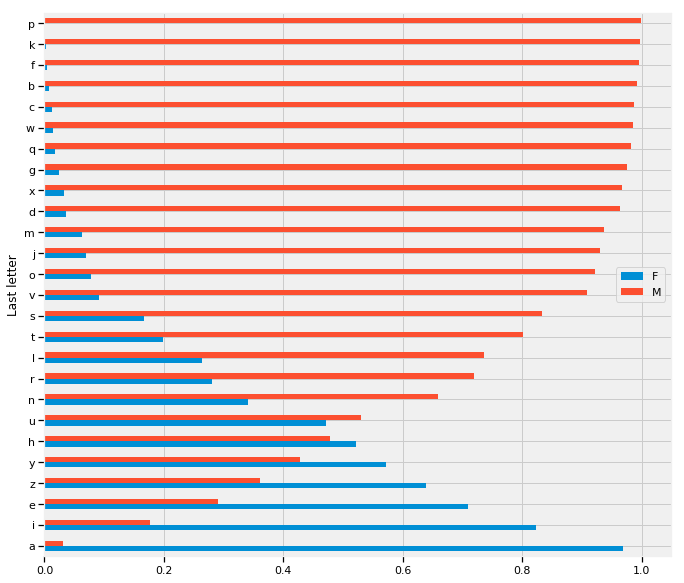